### Decomposition of data into trends and cycles

In general, time series data consist of two main components. The first component can be predicted and includes at least one of these three parts (1) level, (2) trend, and (3) cycle. The level refers to the value around which the data may fluctuate. For instance, the daily temperature in July may fluctuate around 25 centigrade. Sometimes the level can be interpreted as the average value of the time series. The trend refers to the upward or downward patterns in the data. For instance, there is an upward trend in the temperature from winter to summer. Finally, the cycle refers to the recurring patterns over time. For example, temperature data exhibit seasonal patterns. The second component is the random part which is not predictable.
More formally, we can describe a time series as a linear combination of these components.

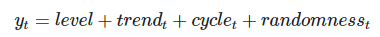

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from IPython.display import Image
Image(filename="decomposition.png")

#### Trends and cycles in simulated time series data
In the following, we simulate time series based on several scenarios. Let’s generate daily temperature values for July that fluctuate around the value of 25 centigrade and then plot them.

In [6]:
# To get the same values as in the content, you can fix the seed using np.random.seed(5).
# generate the random component for 30 days
x_t = pd.Series(np.random.normal(size=30))

# set the level
level = 25

# time series y_t
y_t = level + x_t

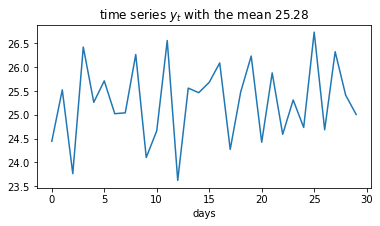

In [7]:
y_t.plot(figsize=(6, 3))
plt.title("time series $y_t$ with the mean {:.2f}".format(y_t.mean()))
plt.xlabel("days")

plt.show()

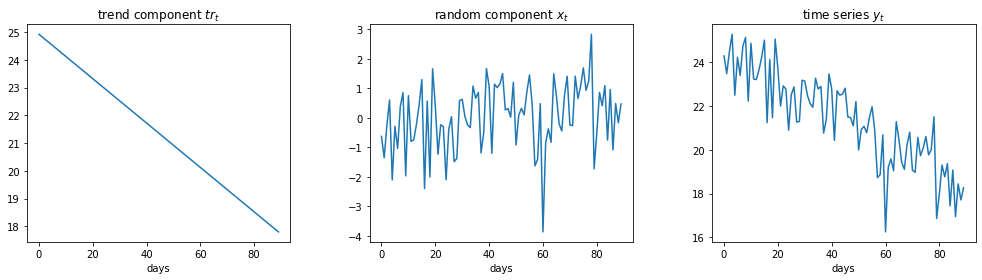

In [8]:
# Let’s add also a downward trend to the data
# generate the random component for 90 days
x_t = pd.Series(np.random.normal(size=90))

# generate the trend
tr_t = level + pd.Series(-0.08 * np.linspace(1, 90, 90))

# time series y_t
y_t = tr_t + x_t

fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(17, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

tr_t.plot(ax=axes[0])
axes[0].set_title("trend component $tr_t$")
axes[0].set_xlabel("days")

x_t.plot(ax=axes[1])
axes[1].set_title("random component $x_t$")
axes[1].set_xlabel("days")

y_t.plot(ax=axes[2])
axes[2].set_title("time series $y_t$")
axes[2].set_xlabel("days")

plt.show()

The plot on the right is a linear combination of the first two plots and shows a downward trend that is perturbed with random noise. Let’s add a seasonal component using a cosine wave. We can think of  as the monthly temperature values over three years.



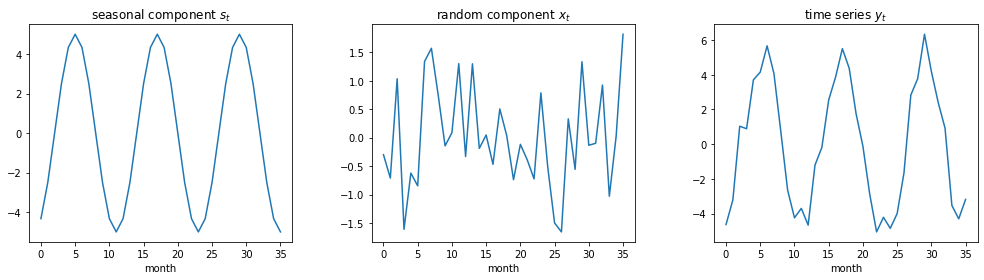

In [9]:
# generate the random component for 36 months
x_t = pd.Series(np.random.normal(size=36))

# generate the seasonal term
t = np.linspace(1, 36, 36)
s_t = pd.Series(5 * np.cos(1 * np.pi * t / 6 + 1 * np.pi))

# time series y_t
y_t = s_t + x_t

fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(17, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

s_t.plot(ax=axes[0])
axes[0].set_title("seasonal component $s_t$")
axes[0].set_xlabel("month")

x_t.plot(ax=axes[1])
axes[1].set_title("random component $x_t$")
axes[1].set_xlabel("month")

y_t.plot(ax=axes[2])
axes[2].set_title("time series $y_t$")
axes[2].set_xlabel("month")

plt.show()

As in the previous case, the plot on the right is a linear combination of the first two plots and shows a seasonal pattern perturbed with random noise.

It is also possible to add an upward trend to resemble global warming over a longer period.

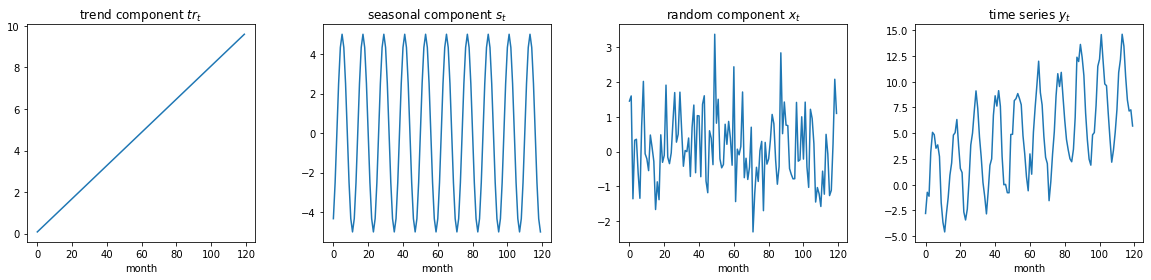

In [10]:
# generate the random component for 120 months
x_t = pd.Series(np.random.normal(size=120))

# generate the trend
t = np.linspace(1, 120, 120)
tr_t = pd.Series(0.08 * t)

# generate the seasonal term
s_t = pd.Series(5 * np.cos(1 * np.pi * t / 6 + 1 * np.pi))

# time series y_t
y_t = tr_t + s_t + x_t
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(20, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

tr_t.plot(ax=axes[0])
axes[0].set_title("trend component $tr_t$")
axes[0].set_xlabel("month")

s_t.plot(ax=axes[1])
axes[1].set_title("seasonal component $s_t$")
axes[1].set_xlabel("month")

x_t.plot(ax=axes[2])
axes[2].set_title("random component $x_t$")
axes[2].set_xlabel("month")

y_t.plot(ax=axes[3])
axes[3].set_title("time series $y_t$")
axes[3].set_xlabel("month")

plt.show()

The plot on the right end shows time series data with trend, seasonal, and random components. In the rest of this unit, we explore some python functions for generating and decomposing time series data.

#### Python functions for generating the predictable components
Since there is no randomness in the predictable components of time series data, they are also called the deterministic components. We can generate the deterministic components using the DeterministicProcess function from the time series analysis of the statsmodels module in Python. It can produce the level, time trends, and either seasonal dummies or cycles. In the following, we generate a deterministic process with a constant, a trend, and a 3-period seasonal term.

In [12]:
from statsmodels.tsa.deterministic import DeterministicProcess

#  create the time index
index = pd.period_range("2021-01-01", freq="M", periods=12)

# create the deterministic components
det_components = DeterministicProcess(
    index, constant=True, order=1, seasonal=True, period=3, fourier=0
)
det_components.in_sample()

,const,trend,"s(2,3)","s(3,3)"
2021-01,1.0,1.0,0.0,0.0
2021-02,1.0,2.0,1.0,0.0
2021-03,1.0,3.0,0.0,1.0
2021-04,1.0,4.0,0.0,0.0
2021-05,1.0,5.0,1.0,0.0
2021-06,1.0,6.0,0.0,1.0
2021-07,1.0,7.0,0.0,0.0
2021-08,1.0,8.0,1.0,0.0
2021-09,1.0,9.0,0.0,1.0
2021-10,1.0,10.0,0.0,0.0


Note that the constant=True initiates the constant term, and by order=1 a linear time trend is added. We can change the order to higher numbers to have polynomial time trends. The seasonal terms appear in the data by the dummies and one can include sine and cosine cycles by setting an integer order for the fourier parameter. In the following, we show how to visualize the deterministic terms by defining a set of coefficients in param. In particular, we set the level to be 25, the time trend to be multiplied by 0.5 and leave the coefficients for the dummies to be 1. Changing these parameters can significantly change the pattern in the data.

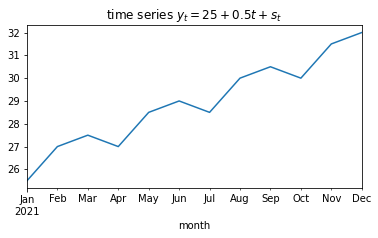

In [13]:
# convert the components to numpy arrays
det_terms = det_components.in_sample().to_numpy()

# create parameters
params = np.array([25, 0.5, 1, 1])

# create the time series y
y = pd.Series(det_terms.dot(params), index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}$")
plt.xlabel("month")
plt.show()

The plot shows an upward trend with a seasonal component. One can also add the random term to the deterministic terms

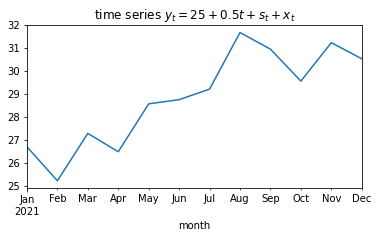

In [14]:
# create the random noise x
x = np.random.normal(size=12)

# create the time series y
y = pd.Series(det_terms.dot(params) + x, index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}+x_{t}$")
plt.xlabel("month")
plt.show()

It is also possible to add lagged values and allow the sample to be partly driven by the past values:

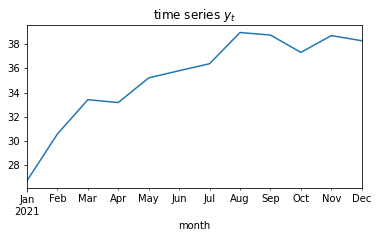

In [15]:
# initialize the process
y = np.empty(12)
y[0] = det_terms[0].dot(params) + x[0]

# create the time series y
for t in range(1, 12):
    y[t] = 0.2 * y[t - 1] + det_terms[t].dot(params) + x[t]
y = pd.Series(y, index=index)


# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}$")
plt.xlabel("month")
plt.show()

**Note:** In time series analysis, we assume that the non-random components can be represented by deterministic functions of time that are not influenced by the random component. On the other hand, the random component does not contain any systematic movements and is considered as residuals. That is why in our simulations, we generated the residuals as a series of independent or uncorrelated random variables with mean zero and constant variance.

#### Python functions for the decomposition of time series data

Note that we observe time series data as a whole in real life rather than by their individual components. However, some methods have been developed to decompose time series data to understand the underlying structure of data. This will help us to make informed decisions during modeling.

In the following, we use STL function (Seasonal-Trend decomposition using LOESS) to split the temperature data into the trend, seasonal, and residual components. The data contains the monthly temperature averages from 1864 to 2020, and are available from the Bern/Zollikofen station of the Swiss national basic climatological network.

Let’s download the data from the resources tab and import it as a dataframe.

In [18]:
# load the data
data = pd.read_csv("c2_homog_mo_BER.txt", skiprows=27, sep="\s+")

# create time index
data["Date"] = data["Year"].astype("str") + "-" + data["Month"].astype("str")
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.index.name = "Date"

# check a few rows of data
data.head()

,Year,Month,Temperature,Precipitation
Date,,,,
1864-01-01,1864,1,-7.6,22.5
1864-02-01,1864,2,-1.8,26.5
1864-03-01,1864,3,3.9,57.1
1864-04-01,1864,4,6.5,55.1
1864-05-01,1864,5,11.9,68.5


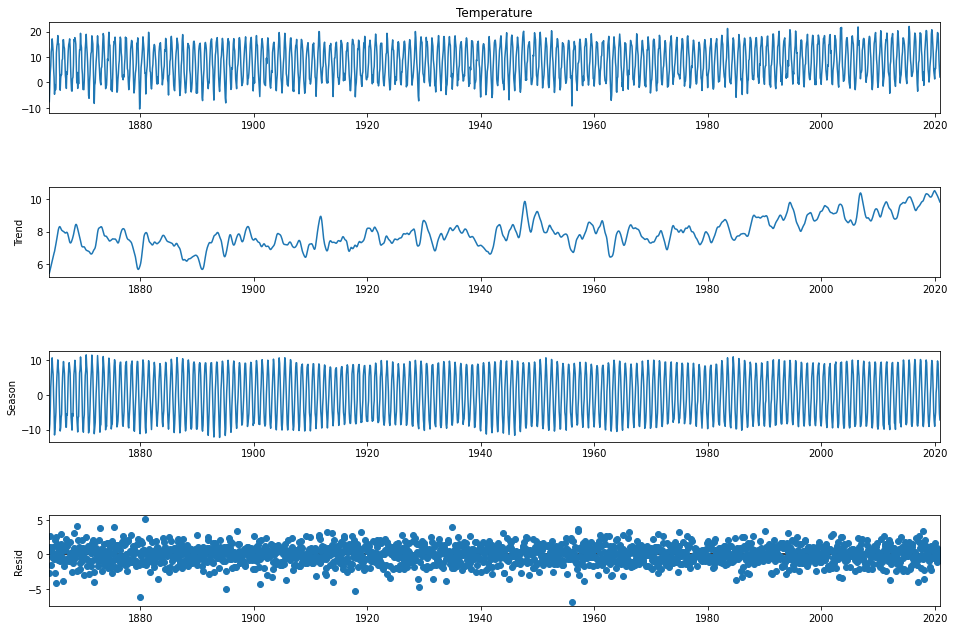

In [19]:
from statsmodels.tsa.seasonal import STL

# decomposition
res = STL(data["Temperature"]).fit()
fig = res.plot()

fig.set_size_inches(15, 10)
plt.show()

The data in the top panel are monthly temperature averages and the three subsequent plots show the three components, that when added together they reconstruct the data shown in the top panel. The decomposition reveals that there is an upward trend only in the last few decades (second panel), whereas the seasonality is present all over the period (third panel). The plot in the last row represents the remaining variations in the data that don’t come from the trend and seasonal components. That is why they are called residuals.

Sometimes we are only interested in studying the trends in a time series data. In this cases, we can seasonally adjust the data by removing the seasonal component which amounts to simply subtracting the seasonal component from the original data.

### Detecting autocorrelation in data 

In this unit, we continue exploring the temporal dependency in time series data, not only through visualization but also by computing the autocorrelation in the data. We also discuss how to statistically test the significance of the autocorrelation.
We calculate the autocorrelation using the Pandas autocorr function that calculates the Pearson correlation between the time series and its shifted self by n-lags in the past. The default value for the number of lags is one i.e. n=1. One can also visualize the autocorrelation for many lags in the past using the Pandas autocorrelation_plot function from the pandas.plotting module. This plot also includes the 95% and 99% confidence bands for the autocorrelation.

We will discuss the statistical concepts of correlation, confidence bands (or intervals), and hypothesis testing later in this course under the statistical data analysis subject. However, following the content of this and the next unit requires only a minimal knowledge of these concepts.

#### Autocorrelation in simulated time series data

In the following, we generate a simulated time series from a normal distribution. The data simply represents random noises over 100 time periods. Since the values are generated independently, we don’t expect to find a significant autocorrelation for any number of lags. Let’s check this using the autocorr and autocorrelation_plot functions.

In [21]:
from pandas.plotting import autocorrelation_plot, lag_plot

# generate the random component
x_t = pd.Series(np.random.normal(size=100))

level = 25

# time series y_t
y_t = level + x_t

# set the number of lag to be 1
n = 1

# calculate the autocorrelation for the 1st lag
print("autocorr with the 1st lag: {:.3f}".format(y_t.autocorr(n)))

# this is equivalent to
print("correlation with the 1st lag: {:.3f}".format(y_t.corr(y_t.shift(n))))

# and also to
print("correlation with the 1st lead: {:.3f}".format(y_t.corr(y_t.shift(-n))))

autocorr with the 1st lag: 0.051
correlation with the 1st lag: 0.051
correlation with the 1st lead: 0.051


Note that the above results show that the correlation of the current values, i.e. values at time, with the values from the previous period, is the same as the correlation of the current values with the next period’s values. Let’s plot the data and the autocorrelations. 

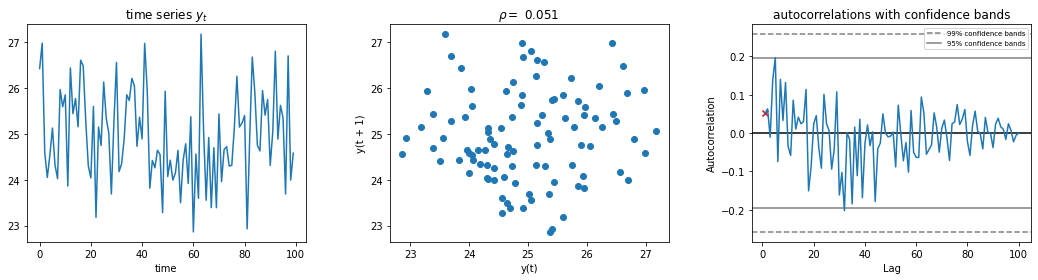

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

# the 1st plot on the left: plot y_t
y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

# the middle plot: scatter plot of y_t against its 1st lag
lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

# the 1st plot on the right: autocorrelations up to 100 lags
autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].legend(["99% confidence bands", "95% confidence bands"], fontsize="x-small")
axes[2].grid()

# let's put a red cross on the 1st autocorrelation value
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")

plt.show()

The plot on the left shows that the values randomly change around 25, i.e., the level. The middle plot shows the scatter plot between the values of two consecutive periods. Finally, in the third plot, the 95% and 99% confidence bands around zero ensure that the autocorrelations are not statistically different from zero as they are all within the bands. Note that since the horizontal line at zero is within the bands, the autocorrelations which fall within the bands should be considered as zero. The value with a red cross shows the autocorrelation for the first lag that is 0.051

Alternatively, one can use the plot_acf function from the statsmodels module.

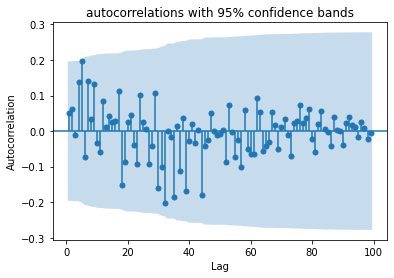

In [24]:
# load the module
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y_t, lags=99, alpha=0.05, zero=False)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")
plt.show()

This autocorrelation plot is very similar to the one we obtained using the autocorrelation_plot function. Note that we set zero=False to avoid including the self correlation p(y_t, y_t), which is equal to 1. We can also define confidence bands using the parameter alpha. The value 0.05 results in the 95% confidence bands. However, as the plot shows, the bands are not constant across lags. This is because a different formula is used to calculate the bands. In fact, the estimator for the variance of autocorrelations is an increasing function of lags.

**Note:** In the context of time series analysis, the acronym ACF is often used for the autocorrelation function. The autocorrelation plot may also be referred to as a correlogram.

#### Adding time dependency in the simulated data and varying it from 1 to 0.1

In the following, we generate another series that has time dependencies and then check the ACFs. At each time step, the time series value is equal to the value from the previous period plus random noise. Therefore, we expect to observe large autocorrelations.

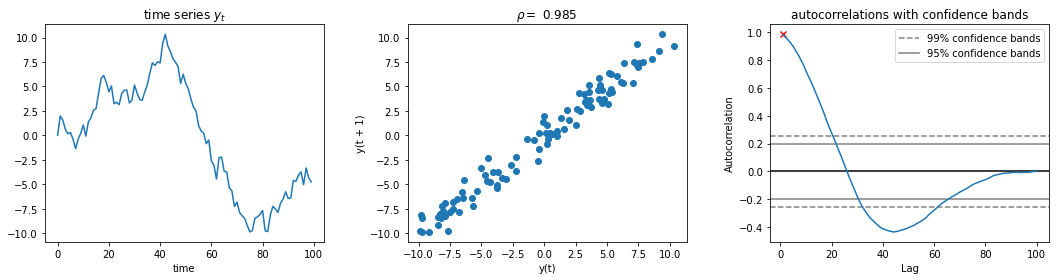

In [25]:
# initialize the values with zero
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

# Lets visualize yt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

The autocorrelation plot with confidence bands shows that most of the autocorrelations are significantly different from zero because they exceed the confidence bands. In particular, for the first few lags, there are strong time dependencies.

Let’s decrease the strength of temporal dependency by generating a time series where at each time step, the time series value is equal to half the value from the previous period plus random noise. We expect to observe smaller autocorrelations.



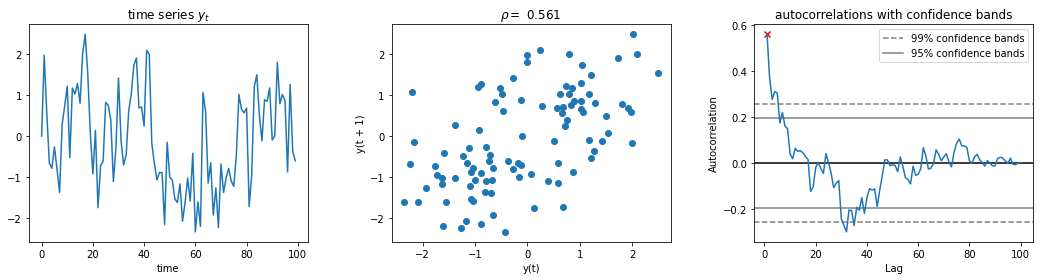

In [26]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.5 * y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

The autocorrelations plot with confidence bands shows that the autocorrelation is significantly different from zero only for the first lag.

Let’s further decrease the strength of dependency by generating a time series where at each time step, the time series value is equal to 0.1 of the value from the previous period plus random noise. We expect to observe even smaller and maybe insignificant autocorrelations.

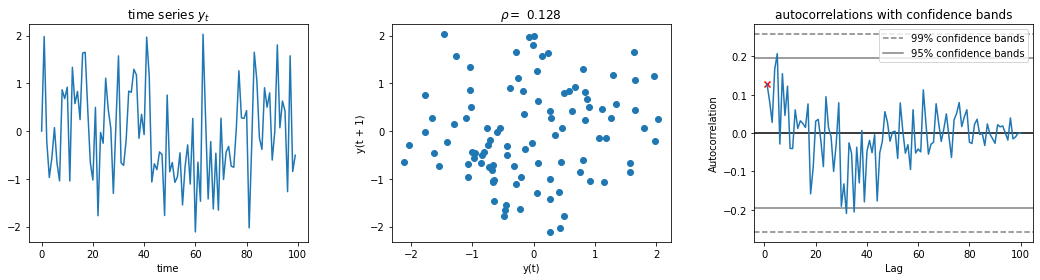

In [27]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.1 * y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

As the autocorrelation plot shows, all the values are within the bands and insignificant; this time series resembles the random noise from the first example. In this case, there are temporal dependencies between consecutive values of the time series; however, the coefficient 0.1 is not strong enough to overcome the random component xt

So far in this unit, we learned that it is essential to check the autocorrelation before starting to model time series data. The presence of autocorrelation in a time series indicates that we should include lags in our model to capture the time series dynamic. We also learned that confidence bands are one way to check if autocorrelations are significant or not. In the following, we briefly discuss how to test the significance of autocorrelations.

#### Statistical test of autocorrelations
We can statistically test the significance of the autocorrelations up to a specified lag using the Ljung–Box Q test (LBQ). The null hypothesis of the LBQ test is that there is no autocorrelation up to a specified lag, or the data are independently distributed. The alternative hypothesis is that at least one of the autocorrelations is significantly different from zero.

This test can be seen as an alternative to the autocorrelation plot with confidence bands that we already explored. Except that here we can test if the autocorrelations are jointly insignificant. We can perform the test using the acorr_ljungbox function from the time series analysis of the statsmodels module. In the following, we apply this test to a simulated series.

In [28]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.5 * y_t[i - 1] + x_t[i]

# testing the significance of autocorrelations for the first 2 lags
sm.stats.acorr_ljungbox(y_t, lags=[2], return_df=True)

,lb_stat,lb_pvalue
2,46.784023,6.933914e-11


The p-value is way below the 0.05 significance level, which means that we can reject the null hypothesis in favor of the alternative that at least one of the two autocorrelations is not zero in population. This confirms our previous observation in the autocorrelation plot with confidence bands that the autocorrelation for the first lag is significantly different from zero.

**In statistical hypothesis testing, we reject the null hypothesis if the p-value is less than significance level of 0.05.**

This test statistic is also useful for testing if a fitted model has been successful in capturing the autocorrelation in a time series. For instance, if we fit a model (e.g. y(t)=ay(t-1)+x_t on the time series y_t that correctly captures the relation between y_t and y_(t-1), then we expect to see no autocorrelation left in the residuals. We can test the presence of autocorrelation in the estimated residuals x_t using the acorr_ljungbox function.

#### Autocorrelation in real data

So far in this unit, we used synthetic data to calculate and test autocorrelations. Let’s calculate and test autocorrelations for the 1st lag for some of the data sets that we used in the previous units i.e. the unemployment rates, GDP, stock prices, temperatures and finally random noises.

Let’s start by loading the data.

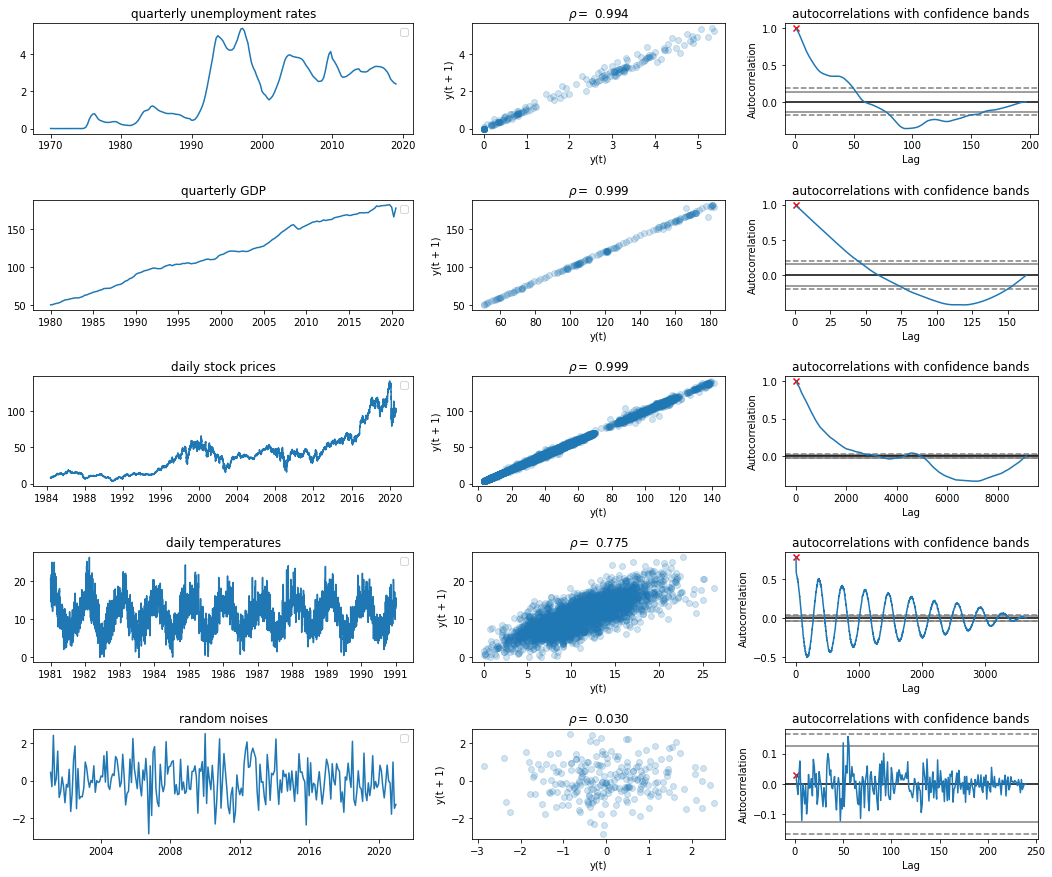

In [30]:
# load unemployment rates
unemp = pd.read_csv("c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
unemp.index = pd.to_datetime(unemp.index, format="%Y-%m-%d")

# load GDP data
gdp = pd.read_csv("c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

# load stock prices
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load temperature data
temp = pd.read_csv(
    "c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random noise
np.random.seed(5)
noise = pd.DataFrame(
    np.random.normal(size=240),
    columns=["noise"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)
# Let’s plot the data and the autocorrelations
fig, axes = plt.subplots(
    nrows=5,
    ncols=3,
    figsize=(18, 15),
    gridspec_kw={"hspace": 0.6, "wspace": 0.2, "width_ratios": [1.5, 1, 1]},
)

# 1st column of plots on the left: plot the data
axes[0, 0].plot(unemp)
axes[1, 0].plot(0.001 * gdp)
axes[2, 0].plot(prices)
axes[3, 0].plot(temp)
axes[4, 0].plot(noise)

#  define the titles
titles = [
    "quarterly unemployment rates",
    "quarterly GDP",
    "daily stock prices",
    "daily temperatures",
    "random noises",
]

#  add labels and titles
for (ax, t) in zip(axes[:, 0].flatten(), titles):
    ax.legend("")
    ax.set_xlabel("")
    ax.set_title(str(t))

# middle column: scatter plots of the values with their first lags
lag_plot(unemp, lag=1, ax=axes[0, 1], alpha=0.2)
lag_plot(0.001 * gdp, lag=1, ax=axes[1, 1], alpha=0.2)
lag_plot(prices, lag=1, ax=axes[2, 1], alpha=0.2)
lag_plot(temp, lag=1, ax=axes[3, 1], alpha=0.2)
lag_plot(noise, lag=1, ax=axes[4, 1], alpha=0.2)

# squeeze dataframes to series and set the titles for lag_plots in the middle column
axes[0, 1].set_title(r"$\rho = $ {:.3f}".format(unemp.squeeze().autocorr(1)))
axes[1, 1].set_title(r"$\rho = $ {:.3f}".format(gdp.squeeze().autocorr(1)))
axes[2, 1].set_title(r"$\rho = $ {:.3f}".format(prices.squeeze().autocorr(1)))
axes[3, 1].set_title(r"$\rho = $ {:.3f}".format(temp.squeeze().autocorr(1)))
axes[4, 1].set_title(r"$\rho = $ {:.3f}".format(noise.squeeze().autocorr(1)))

# 1st column of plots on the right: plot autocorrelations
autocorrelation_plot(unemp, ax=axes[0, 2])
autocorrelation_plot(gdp, ax=axes[1, 2])
autocorrelation_plot(prices, ax=axes[2, 2])
autocorrelation_plot(temp, ax=axes[3, 2])
autocorrelation_plot(noise, ax=axes[4, 2])

# add titles
for ax in axes[:, 2].flatten():
    ax.grid()
    ax.set_title("autocorrelations with confidence bands")

# add the red cross on the 1st lag
axes[0, 2].scatter(1, unemp.squeeze().autocorr(1), marker="x", c="red")
axes[1, 2].scatter(1, gdp.squeeze().autocorr(1), marker="x", c="red")
axes[2, 2].scatter(1, prices.squeeze().autocorr(1), marker="x", c="red")
axes[3, 2].scatter(1, temp.squeeze().autocorr(1), marker="x", c="red")
axes[4, 2].scatter(1, noise.squeeze().autocorr(1), marker="x", c="red")

plt.show()

We have already seen the plots in the first column in the previous units. In the second column, we used lag_plot only for the first lag, and as for the title we print the autocorrelation value. The third column shows the autocorrelations with confidence bands across all lags, and only the first lag is flagged with a red cross. As expected, the autocorrelation for the first lag is insignificant for the random noise only.

As an alternative to the confidence bands, we can also test the significance of the autocorrelations for the first lags using the Ljung-Box test statistics as described before.

In [31]:
# Ljung-Box test of autocorrelations for the first lags
test = []
test.append(sm.stats.acorr_ljungbox(unemp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(gdp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(prices, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(temp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(noise, lags=[1], return_df=False))

pd.DataFrame(
    test,
    columns=["LB test statistic", "p-value"],
    index=["unemp", "gdp", "prices", "temp", "noise"],
    dtype=np.float,
).round(2)

,LB test statistic,p-value
unemp,195.92,0.00
gdp,160.30,0.00
prices,9122.68,0.00
temp,2189.94,0.00
noise,0.21,0.64


As expected, based on the p-values we reject the null of no autocorrelations for all series except the last one i.e. the noise data.

### Detecting and removing non-stationarity

In this unit, we continue exploring stationarity in time series data by learning how to detect it and convert non-stationary data to stationary data. The general idea is to make sure the time series data are stationarity before modeling. It means that we should make sure that the statistical properties of a time series, i.e., mean, variance, and covariance, do not vary too much over time. This will help some statistical models to result in more accurate predictions. Remember that we visually showed that stock price data are not stationary. In the following, we use two methods to test if the prices are stationary or not statistically.

#### Statistical test of non-stationarity
One popular test for this purpose is the Augmented Dickey-Fuller (ADF) test. The null hypothesis is that the data has a unit root (i.e. the data is non-stationary), and if we fail to reject the null hypothesis, this test may provide evidence that the series is non-stationary.

Let’s load the price data again and test them.

In [33]:
# load the data
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

Let’s import the adfuller function from the time series analysis of the statsmodels module and do the test.

In [34]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(prices)
print("p-value is %.2f" % adf_test[1])

p-value is 0.84


Since the p-value is greater than the significance level of 0.05, we cannot reject the null hypothesis, and therefore conclude that the price series is non-stationary.

**In statistical hypothesis testing, we reject the null hypothesis if the p-value is less than significance level of 0.05.**

However, a time series can be trend-stationary while it is non-stationary. The time series analysis of statsmodels module in Python offers another function called kpss for checking the stationarity of a time series. However, the null hypothesis for the KPSS test, in contrast to the ADF test, is that the data is stationary around a deterministic trend, i.e. trend-stationary. Let’s perform this test on the price data.

In [36]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(prices, regression="ct", nlags="auto")
print("p-value is %.2f" % kpss_test[1])

p-value is 0.01


C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Since the p-value is smaller than the significance level of 0.05, we reject the null hypothesis that the price series is trend-stationary, and therefore it is non-stationary as in the case of the ADF test.

Note that in the case of the KPSS test we should choose regression='ct' to test the trend-stationarity. We get the warning message because the test statistic is outside the table of critical values and therefore the p-value is outside the interval (0.01, 0.1). In such cases, the boundary p-value of 0.01 will be returned.

While using only the ADF test is enough, by applying both tests we can acquire more information about the data.

There are four possible outcomes after applying the two tests and below are the conclusions one can draw from the results:

- Case 1: Both tests conclude that the series is not stationary. Then the series is not stationary
- Case 2: Both tests conclude that the series is stationary. Then the series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity. Then the series is trend stationary and should be detrended to become stationary.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity. Then the series is difference stationary and should be differenced to become stationary.

#### Removing non-stationarity

It is possible to remove the non-stationarity of a time series by differencing or removing the time trend. In differencing, we create a new series by taking the difference between every two consecutive observations using the Pandas diff(1) function. Then we can check the stationarity of the new series using the tests described above.

For some time series data, it is possible that the differencing has to be applied more than once to achieve the stationarity. In the following, we apply the differencing on the prices and plot them.

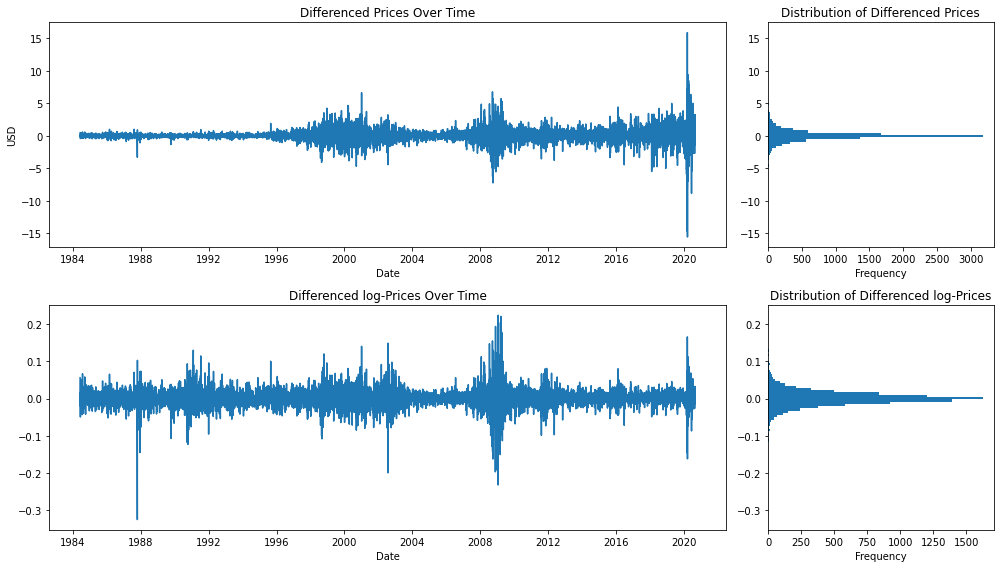

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0, 0].set_title("Differenced Prices Over Time")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("USD")
ax[0, 0].plot(prices.diff(1).dropna())

# create the histogram of prices in the second plot
ax[0, 1].set_title("Distribution of Differenced Prices")
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].hist(prices.diff(1).dropna(), bins=90, orientation="horizontal")

# create the first plot for the prices over time
ax[1, 0].set_title("Differenced log-Prices Over Time")
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("")
ax[1, 0].plot(np.log(prices).diff(1).dropna())

# create the histogram of prices in the second plot
ax[1, 1].set_title("Distribution of Differenced log-Prices")
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].hist(np.log(prices).diff(1).dropna(), bins=90, orientation="horizontal")

fig.tight_layout()
plt.show()

Note that the differencing helped to stabilize the level of the prices around zero (plots in the first row), and may be enough to make the series stationary. However, the variance of the differenced data is not the same over time. The price changes are very smooth until 1996, but they vary a lot during some later periods namely the dot-com bubble 2000-2002, the great financial crisis of 2007-2008, and the market crash in early 2020. Other transformations such as logarithms can help to stabilize the variance. The plots at the bottom show the differenced log-prices. That is, prices are first log-transformed and then differenced. The variance now looks more homogeneous over time. Let’s test the stationarity of the new data.



In [38]:
adf_test = adfuller(np.log(prices).diff(1).dropna(), regression="nc")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(np.log(prices).diff(1).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.00
KPSS p-value is 0.10


C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests indicate that the differenced log-price series is stationary. Note that by differencing the data loses one observation and that is why we used dropna().

#### Non-stationarity and seasonality
Sometimes it is necessary to take a seasonal difference to remove non-stationarity of a time series. Let’s do this with the monthly gas consumption data. To start, download the data from the resources tab and import it as a dataframe.

In [39]:
# U.S. Natural Gas Total Consumption in billion cubic feet
data = pd.read_csv("c2_gas_US.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%b.%y")

data.head()

,U.S. Natural Gas Total Consumption (Bcf)
Date,
2001-01-01,2676.998
2001-02-01,2309.464
2001-03-01,2246.633
2001-04-01,1807.170
2001-05-01,1522.382


In [40]:
# Let’s perform the tests of non-stationarity for this data.

adf_test = adfuller(data, regression="ct")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(data, regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.48
KPSS p-value is 0.10


C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KPSS indicates stationarity and ADF indicates non-stationarity. Then the monthly gas consumption data is trend stationary which is also evident in the first panel of the following plot. Therefore, it should be detrended to become stationary.

To remove the non-stationarity, instead of differencing two consecutive values, we subtract each observation from an observation 12 months in the past because the patterns repeat every 12 months (e.g. the peaks happen at every January). The result is the plot of new series in the middle panel which looks stationary. We can further apply the first difference to this new series as shown in the bottom panel to make it even more stationary.

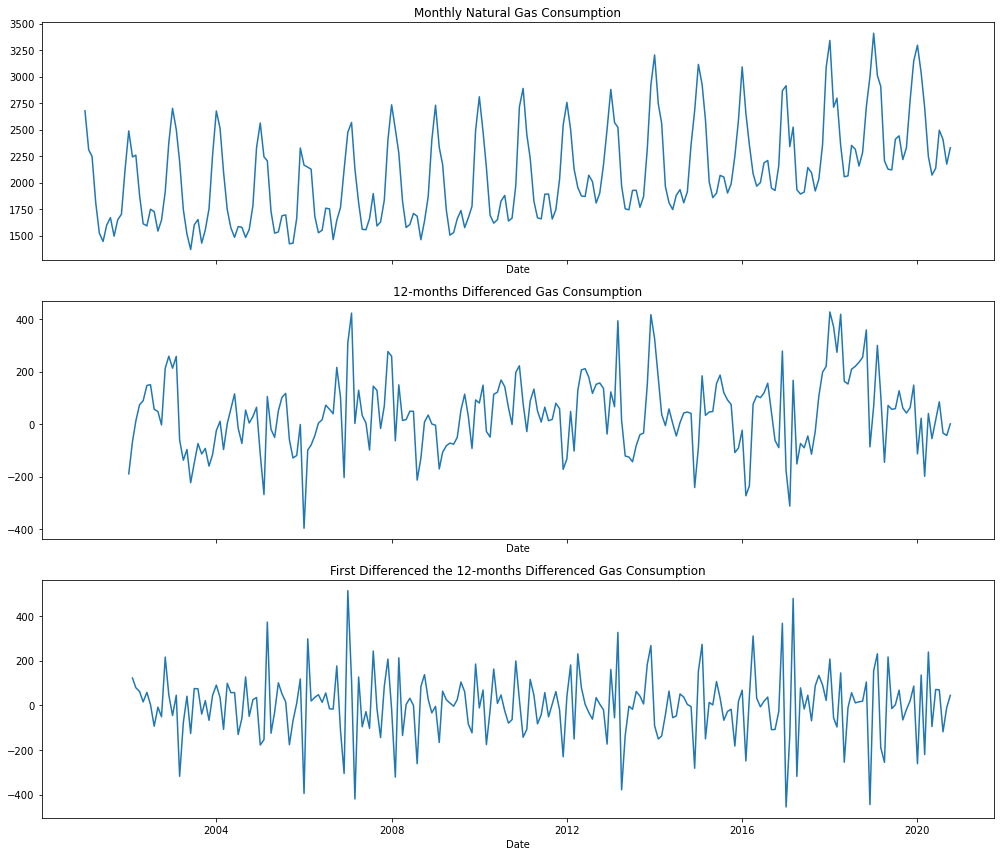

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# create the plot for original data
ax[0].set_title("Monthly Natural Gas Consumption")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("")
ax[0].plot(data)

# create the seasonally differenced plot
ax[1].set_title("12-months Differenced Gas Consumption")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("")
ax[1].plot(data.diff(12))

# create the first differenced plot
ax[2].set_title("First Differenced the 12-months Differenced Gas Consumption")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("")
ax[2].plot(data.diff(12).diff(1))

fig.tight_layout()
plt.show()

In [42]:
adf_test = adfuller(data.diff(12).diff(1).dropna(), regression="nc")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(data.diff(12).diff(1).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.00
KPSS p-value is 0.10


C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests indicate that the double differenced gas consumption data are stationary.